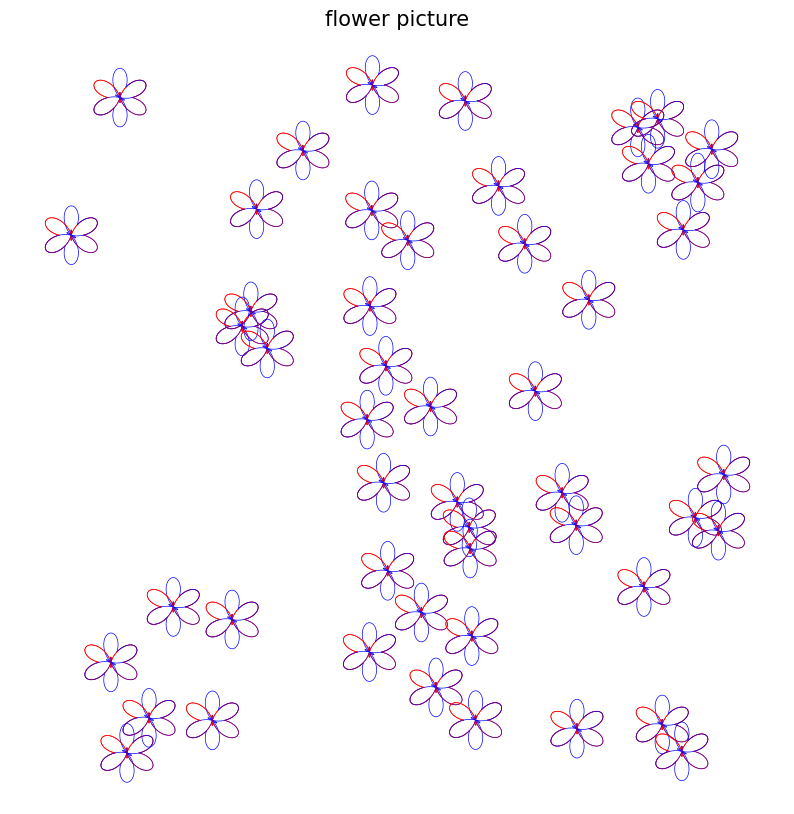

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

def rotate(x, y, theta):

    rotate_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                   [np.sin(theta), np.cos(theta)]]);

    do = rotate_matrix @ np.array([x, y])
    return do[0], do[1]

def flower(a, k, p, center=(0, 0)):

    theta = np.pi * np.linspace(0, 1, 1000)
    r = a + np.sin(k * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    colors = ['red', 'blue', 'purple']

    for i in range(p):
        angle = i * (2 * np.pi / p)
        x, y = rotate(x, y, angle)
        new_s = x + center[0]
        new_y = y + center[1]
        plt.plot(new_s, new_y, color=colors[i % len(colors)], linewidth=0.5)


# y=a+sin(kx)
a = 0.7
k = 3
p = 6       #花瓣
nums = 50    #花數量
x_range = (-20, 20)  #x範圍
y_range = (-20, 20)  #y範圍

plt.figure(figsize=(10, 10))

for _ in range(nums):
    center_x = random.uniform(*x_range)
    center_y = random.uniform(*y_range)
    flower(a, k, p, center=(center_x, center_y))

plt.axis('equal')
plt.axis('off')
plt.title("flower picture", fontsize=15)
plt.show()


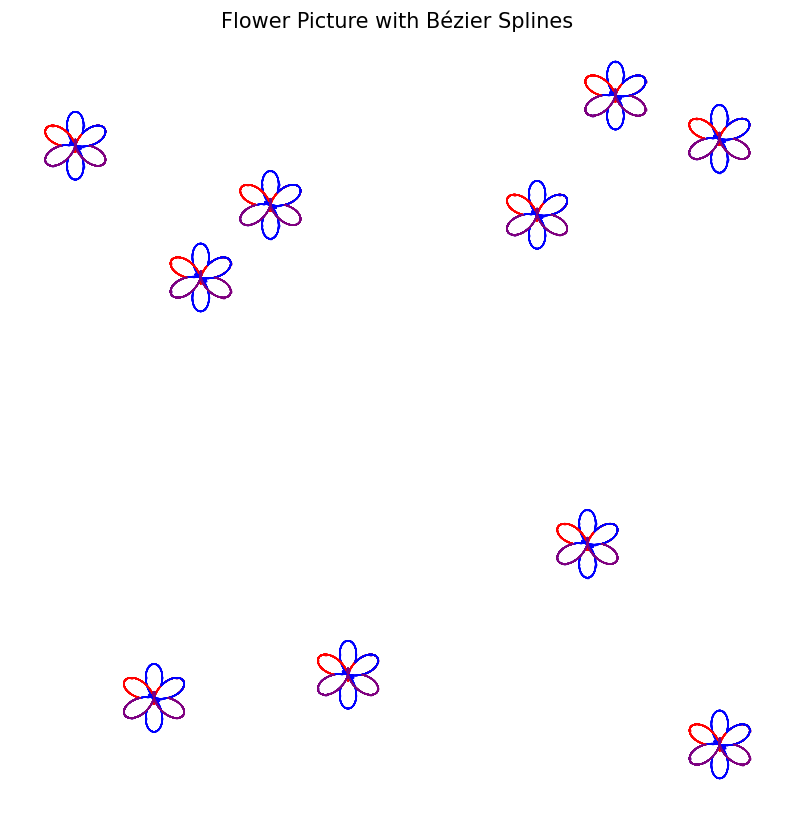

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

def rotate(x, y, theta):
    rotate_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta), np.cos(theta)]])
    do = rotate_matrix @ np.array([x, y])
    return do[0], do[1]

def bezier_curve(p0, p1, p2, p3, t):
    return (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * p1 + 3 * (1 - t) * t**2 * p2 + t**3 * p3

def flower(a, k, p, center=(0, 0)):
    theta = np.pi * np.linspace(0, 1, 1000)
    r = a + np.sin(k * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    colors = ['red', 'blue', 'purple']

    for i in range(p):
        angle = i * (2 * np.pi / p)
        x, y = rotate(x, y, angle)
        new_s = x + center[0]
        new_y = y + center[1]


        for j in range(len(new_s) - 3):
            p0 = np.array([new_s[j], new_y[j]])
            p1 = np.array([new_s[j + 1], new_y[j + 1]])
            p2 = np.array([new_s[j + 2], new_y[j + 2]])
            p3 = np.array([new_s[j + 3], new_y[j + 3]])

            bezier_x = []
            bezier_y = []
            for t in np.linspace(0, 1, 100):
                bx, by = bezier_curve(p0, p1, p2, p3, t)
                bezier_x.append(bx)
                bezier_y.append(by)

            plt.plot(bezier_x, bezier_y, color=colors[i % len(colors)], linewidth=1)

# y = a + sin(kx)
a = 0.7
k = 3
p = 6  # petals
nums = 10  # number of flowers
x_range = (-20, 20)  # x range
y_range = (-20, 20)  # y range

plt.figure(figsize=(10, 10))

for _ in range(nums):
    center_x = random.uniform(*x_range)
    center_y = random.uniform(*y_range)
    flower(a, k, p, center=(center_x, center_y))

plt.axis('equal')
plt.axis('off')
plt.title("Flower Picture with Bézier Splines", fontsize=15)
plt.show()
